<a href="https://colab.research.google.com/github/tomaszpionka/ds-project/blob/main/bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

df = pd.read_csv("https://raw.githubusercontent.com/tomaszpionka/ds-project/main/london_merged.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


# Przeprowadź regresję liniową, w której zmienną zależną jest kolumna cnt (wyłącz z analiz pierwszą kolumnę). 

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as r_coef
import statsmodels.api as sm

df_notime = df.copy()
df_notime = df_notime.drop(['timestamp'], axis = 1)

df_notime = (df_notime - df_notime.mean())/df_notime.std()

# target
df_y = df_notime['cnt']
# data
df_x = df_notime.drop(['cnt'], axis = 1)

model = LinearRegression()
model.fit(df_x, df_y)
prediction = model.predict(df_x)

from sklearn.metrics import r2_score
r_squared_linear_reg = r2_score(df_y, prediction)
r_squared_linear_reg

0.26840705382611874

# Wskaż, które parametry regresji są istotne na poziomie istotności 0,05 

In [70]:
df_x = sm.add_constant(df_x)
model = sm.OLS(df_y,df_x)
results = model.fit()
p = results.pvalues
#Get params significant at 0.05 p-value
print(p[p<=0.05])

t1              2.842620e-13
t2              1.922529e-02
hum             0.000000e+00
wind_speed      1.867415e-04
weather_code    6.381311e-03
is_holiday      4.446235e-08
is_weekend      6.296503e-41
season          6.821574e-18
dtype: float64


# Z koluny time stamp stwórz kolumnę hour oraz year 

In [73]:
import datetime
from datetime import datetime

df['timestamp']= pd.to_datetime(df['timestamp'])
df['year'] = pd.to_datetime(df['timestamp'], format='%Y:%M:%D').dt.year
df['hour'] = pd.to_datetime(df['timestamp'], format='%Y:%M:%D').dt.hour

df_time = df.copy()

df_time = df_time.drop(['timestamp'], axis=1)


# Przedstaw korelacje między wszystkimi zmiennymi za pomocą heatmapy.

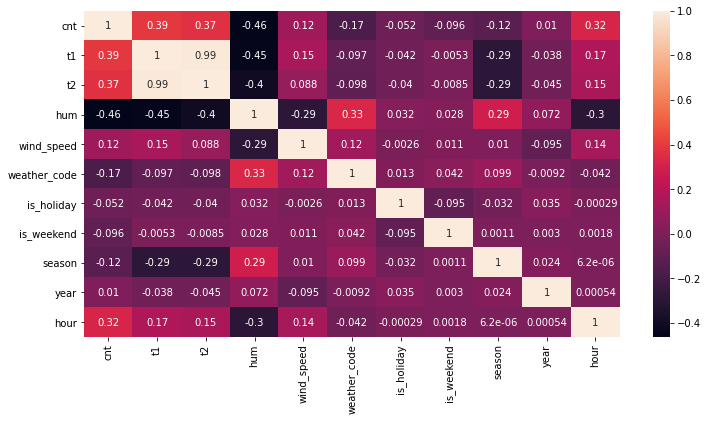

In [76]:
df_corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, annot = True)

# Podziel dane ze względu na rok, przeprowadź dla każdego z lat osobną analizę regresyjną. 

In [87]:
print(df_time.groupby('year')['cnt'].nunique())

year
2015    2967
2016    3040
2017      71
Name: cnt, dtype: int64


In [93]:
df_2015 = df_time[df_time["year"] == 2015]
df_2016 = df_time[df_time["year"] == 2016]
df_2017 = df_time[df_time["year"] == 2017]

In [114]:
def linear_function(df):
  df = df
  df = df.copy()
  print(df.head(3))
  df_y = df['cnt']
  df_x = df.drop(['cnt'], axis = 1)
  model = LinearRegression()
  model.fit(df_x, df_y)
  prediction = model.predict(df_x)
  r_squared_linear_reg = r2_score(df_y, prediction)
  print("R^2 is equal to: {}".format(r_squared_linear_reg))

In [115]:
for i in [df_2015, df_2016, df_2017]:
  linear_function(i)
  print()

   cnt   t1   t2   hum  wind_speed  ...  is_holiday  is_weekend  season  year  hour
0  182  3.0  2.0  93.0         6.0  ...         0.0         1.0     3.0  2015     0
1  138  3.0  2.5  93.0         5.0  ...         0.0         1.0     3.0  2015     1
2  134  2.5  2.5  96.5         0.0  ...         0.0         1.0     3.0  2015     2

[3 rows x 11 columns]
R^2 is equal to: 0.30508558722768087

      cnt   t1   t2   hum  ...  is_weekend  season  year  hour
8643  786  6.0  3.5  81.0  ...         0.0     3.0  2016     0
8644  660  5.5  3.0  84.0  ...         0.0     3.0  2016     1
8645  387  5.0  2.5  84.0  ...         0.0     3.0  2016     2

[3 rows x 11 columns]
R^2 is equal to: 0.3043269423313456

       cnt   t1   t2   hum  ...  is_weekend  season  year  hour
17342  933  7.5  5.0  84.5  ...         1.0     3.0  2017     0
17343  895  7.0  5.0  87.0  ...         1.0     3.0  2017     1
17344  339  7.0  4.0  87.0  ...         1.0     3.0  2017     2

[3 rows x 11 columns]
R^2 is equal